# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
weather_api_key

'861689b2fe84dbee9fcc374bb4a99e0e'

In [44]:
city_name = []
lat = []
lng = []
temp = []
humid = []
clouds = []
wind = []
country=[]
date1 = []
counter = 1
#Loop through each city, extract required items, and print result
print('------------------------------')
print('Start of Records')
print('------------------------------')

for i, city in enumerate(cities):
    if( i% 50 == 0 and i >=50):
        set_count +=1 
        counter = 0
    try:
        city_data = (requests.get(url + '&q=' + city)).json()
        print(city_data)
        city_name.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        temp.append(city_data['main']['temp_max'])
        humid.append(city_data['main']['humidity'])
        clouds.append(city_data['clouds']['all'])
        wind.append(city_data['wind']['speed'])
        country.append(city_data ["sys"]["country"])
        date1.append(city_data["dt"])
        #pd.to_datetime(df['DOB'])
        print(f'City number {counter} of {len(cities)} complete. | Added {city}')
        counter = counter + 1
    
    except KeyError:
        print(f'Missing data in city number {counter} of {len(cities)}. | Skipping {city}')
        counter = counter + 1

------------------------------
Start of Records
------------------------------
{'coord': {'lon': -114.07, 'lat': 40.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 55.4, 'feels_like': 40.17, 'temp_min': 55.4, 'temp_max': 55.4, 'pressure': 1005, 'humidity': 33}, 'visibility': 16093, 'wind': {'speed': 19.46, 'deg': 180}, 'clouds': {'all': 1}, 'dt': 1586158075, 'sys': {'type': 1, 'id': 3994, 'country': 'US', 'sunrise': 1586178628, 'sunset': 1586225167}, 'timezone': -21600, 'id': 5710035, 'name': 'West Wendover', 'cod': 200}
City number 1 of 632 complete. | Added west wendover
{'coord': {'lon': 158.65, 'lat': 53.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 35.6, 'feels_like': 26.76, 'temp_min': 35.6, 'temp_max': 35.6, 'pressure': 1026, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 6.71, 'deg': 170}, 'clouds': {'all': 1}

{'coord': {'lon': -68.97, 'lat': 18.43}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 79.14, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1015, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 70}, 'clouds': {'all': 20}, 'dt': 1586158079, 'sys': {'type': 1, 'id': 7066, 'country': 'DO', 'sunrise': 1586168726, 'sunset': 1586213426}, 'timezone': -14400, 'id': 3500957, 'name': 'La Romana', 'cod': 200}
City number 16 of 632 complete. | Added la romana
{'coord': {'lon': -169.92, 'lat': -19.06}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 82.72, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1009, 'humidity': 94}, 'wind': {'speed': 3.36, 'deg': 110}, 'clouds': {'all': 100}, 'dt': 1586158079, 'sys': {'type': 1, 'id': 7306, 'country': 'NU', 'sunrise': 1586107639, 'sunse

{'coord': {'lon': -17.03, 'lat': 20.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 66.2, 'feels_like': 57.31, 'temp_min': 66.2, 'temp_max': 66.2, 'pressure': 1017, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 20.8, 'deg': 30}, 'clouds': {'all': 0}, 'dt': 1586158082, 'sys': {'type': 1, 'id': 2444, 'country': 'MR', 'sunrise': 1586156185, 'sunset': 1586201040}, 'timezone': 0, 'id': 2377457, 'name': 'Nouadhibou', 'cod': 200}
City number 32 of 632 complete. | Added nouadhibou
{'coord': {'lon': -45.24, 'lat': 60.14}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 22.41, 'feels_like': 10.71, 'temp_min': 22.41, 'temp_max': 22.41, 'pressure': 1004, 'humidity': 92, 'sea_level': 1004, 'grnd_level': 1003}, 'wind': {'speed': 11.99, 'deg': 295}, 'snow': {'3h': 0.18}, 'clouds': {'all': 81}, 'dt': 1586158083, 'sys': {'country': 'GL', 's

{'coord': {'lon': 55.77, 'lat': -21.36}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 79.66, 'feels_like': 79.99, 'temp_min': 73, 'temp_max': 84.2, 'pressure': 1015, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 120}, 'clouds': {'all': 20}, 'dt': 1586157933, 'sys': {'type': 1, 'id': 2127, 'country': 'RE', 'sunrise': 1586139948, 'sunset': 1586182340}, 'timezone': 14400, 'id': 935215, 'name': 'Saint-Philippe', 'cod': 200}
City number 47 of 632 complete. | Added saint-philippe
{'coord': {'lon': 12.61, 'lat': 13.32}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 86, 'feels_like': 78.17, 'temp_min': 86, 'temp_max': 86, 'pressure': 1007, 'humidity': 13, 'sea_level': 1007, 'grnd_level': 973}, 'wind': {'speed': 6.91, 'deg': 16}, 'clouds': {'all': 1}, 'dt': 1586158086, 'sys': {'country': 'NE', 'sunrise': 1586149317, '

{'coord': {'lon': -70.92, 'lat': -53.15}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 41, 'feels_like': 31.51, 'temp_min': 41, 'temp_max': 41, 'pressure': 1010, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 300}, 'clouds': {'all': 75}, 'dt': 1586158090, 'sys': {'type': 1, 'id': 8487, 'country': 'CL', 'sunrise': 1586171770, 'sunset': 1586211317}, 'timezone': -10800, 'id': 3874787, 'name': 'Punta Arenas', 'cod': 200}
City number 11 of 632 complete. | Added punta arenas
{'coord': {'lon': 30.79, 'lat': 59.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 36.39, 'feels_like': 30.92, 'temp_min': 34, 'temp_max': 37.99, 'pressure': 1031, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 2.24}, 'clouds': {'all': 94}, 'dt': 1586158091, 'sys': {'type': 1, 'id': 8926, 'country': 'RU', 'sunrise': 1586142

{'coord': {'lon': 147.06, 'lat': -42.78}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 52.61, 'feels_like': 42.75, 'temp_min': 48, 'temp_max': 57.2, 'pressure': 1017, 'humidity': 47}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 280}, 'clouds': {'all': 40}, 'dt': 1586158094, 'sys': {'type': 1, 'id': 9545, 'country': 'AU', 'sunrise': 1586118811, 'sunset': 1586159667}, 'timezone': 36000, 'id': 2155415, 'name': 'New Norfolk', 'cod': 200}
City number 27 of 632 complete. | Added new norfolk
{'coord': {'lon': 19.42, 'lat': 48.56}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 41.58, 'feels_like': 33.82, 'temp_min': 37, 'temp_max': 46.4, 'pressure': 1032, 'humidity': 45}, 'visibility': 10000, 'wind': {'speed': 5.21, 'deg': 105}, 'clouds': {'all': 0}, 'dt': 1586158094, 'sys': {'type': 1, 'id': 7039, 'country': 'SK', 'sunrise'

{'coord': {'lon': -69.36, 'lat': 77.48}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 6.78, 'feels_like': -4.56, 'temp_min': 6.78, 'temp_max': 6.78, 'pressure': 1021, 'humidity': 80, 'sea_level': 1021, 'grnd_level': 1021}, 'wind': {'speed': 9.1, 'deg': 74}, 'clouds': {'all': 6}, 'dt': 1586158098, 'sys': {'country': 'GL', 'sunrise': 1586160785, 'sunset': 1586221553}, 'timezone': -10800, 'id': 3831208, 'name': 'Qaanaaq', 'cod': 200}
City number 42 of 632 complete. | Added qaanaaq
{'coord': {'lon': -175.2, 'lat': -21.2}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 80.22, 'temp_min': 77, 'temp_max': 77, 'pressure': 1010, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 1586158098, 'sys': {'type': 1, 'id': 7285, 'country': 'TO', 'sunrise': 1586195388, 'sunset'

{'cod': '404', 'message': 'city not found'}
Missing data in city number 8 of 632. | Skipping samusu
{'cod': '404', 'message': 'city not found'}
Missing data in city number 9 of 632. | Skipping nizhneyansk
{'coord': {'lon': -74.78, 'lat': -0.19}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 73.06, 'feels_like': 79.92, 'temp_min': 73.06, 'temp_max': 73.06, 'pressure': 1011, 'humidity': 92, 'sea_level': 1011, 'grnd_level': 990}, 'wind': {'speed': 1.92, 'deg': 251}, 'rain': {'3h': 4.47}, 'clouds': {'all': 100}, 'dt': 1586158102, 'sys': {'country': 'CO', 'sunrise': 1586170674, 'sunset': 1586214265}, 'timezone': -18000, 'id': 3671437, 'name': 'Caucayá', 'cod': 200}
City number 10 of 632 complete. | Added puerto leguizamo
{'coord': {'lon': 28.4, 'lat': 4.57}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 73.04, 'feels_like': 74.37, 'temp

{'coord': {'lon': 133.23, 'lat': 35.55}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 57.2, 'feels_like': 47.52, 'temp_min': 57.2, 'temp_max': 57.2, 'pressure': 1018, 'humidity': 35}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 330}, 'clouds': {'all': 40}, 'dt': 1586158038, 'sys': {'type': 1, 'id': 8028, 'country': 'JP', 'sunrise': 1586119591, 'sunset': 1586165523}, 'timezone': 32400, 'id': 1853174, 'name': 'Sakaiminato', 'cod': 200}
City number 23 of 632 complete. | Added sakaiminato
{'coord': {'lon': 73.08, 'lat': -0.6}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 83.41, 'feels_like': 89.49, 'temp_min': 83.41, 'temp_max': 83.41, 'pressure': 1013, 'humidity': 71, 'sea_level': 1013, 'grnd_level': 1013}, 'wind': {'speed': 5.57, 'deg': 29}, 'clouds': {'all': 6}, 'dt': 1586158105, 'sys': {'country': 'MV', 'sunrise': 1

{'coord': {'lon': 147.98, 'lat': -37.88}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 59, 'feels_like': 56.28, 'temp_min': 59, 'temp_max': 59, 'pressure': 1018, 'humidity': 61}, 'wind': {'speed': 3, 'deg': 148, 'gust': 8.01}, 'clouds': {'all': 36}, 'dt': 1586158108, 'sys': {'type': 3, 'id': 2003486, 'country': 'AU', 'sunrise': 1586118378, 'sunset': 1586159658}, 'timezone': 36000, 'id': 2160735, 'name': 'Lakes Entrance', 'cod': 200}
City number 39 of 632 complete. | Added lakes entrance
{'cod': '404', 'message': 'city not found'}
Missing data in city number 40 of 632. | Skipping belushya guba
{'cod': '404', 'message': 'city not found'}
Missing data in city number 41 of 632. | Skipping saleaula
{'coord': {'lon': -74.97, 'lat': 39.78}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 52.5, 'feels_like': 49.48, 'temp_min': 50, 'tem

{'coord': {'lon': -88.16, 'lat': 40.31}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 39.96, 'feels_like': 34.38, 'temp_min': 37, 'temp_max': 43, 'pressure': 1020, 'humidity': 86}, 'visibility': 16093, 'wind': {'speed': 4.7, 'deg': 70}, 'clouds': {'all': 1}, 'dt': 1586158113, 'sys': {'type': 1, 'id': 6026, 'country': 'US', 'sunrise': 1586172439, 'sunset': 1586218922}, 'timezone': -18000, 'id': 4907131, 'name': 'Rantoul', 'cod': 200}
City number 10 of 632 complete. | Added rantoul
{'coord': {'lon': 120.32, 'lat': 63.45}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 33.85, 'feels_like': 24.55, 'temp_min': 33.85, 'temp_max': 33.85, 'pressure': 1023, 'humidity': 90, 'sea_level': 1023, 'grnd_level': 1010}, 'wind': {'speed': 9.98, 'deg': 271}, 'clouds': {'all': 99}, 'dt': 1586158113, 'sys': {'country': 'RU', 'sunrise': 1586120429, 

{'coord': {'lon': -105.2, 'lat': 20.7}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 71.6, 'feels_like': 76.93, 'temp_min': 71.6, 'temp_max': 71.6, 'pressure': 1013, 'humidity': 88}, 'visibility': 19312, 'wind': {'speed': 2.24, 'deg': 30}, 'clouds': {'all': 40}, 'dt': 1586158116, 'sys': {'type': 1, 'id': 7156, 'country': 'MX', 'sunrise': 1586177340, 'sunset': 1586222198}, 'timezone': -18000, 'id': 4004293, 'name': 'Ixtapa', 'cod': 200}
City number 25 of 632 complete. | Added ixtapa
{'coord': {'lon': -105.93, 'lat': 24.08}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 65.14, 'feels_like': 59.4, 'temp_min': 65.14, 'temp_max': 65.14, 'pressure': 1015, 'humidity': 30, 'sea_level': 1015, 'grnd_level': 915}, 'wind': {'speed': 4.09, 'deg': 72}, 'clouds': {'all': 83}, 'dt': 1586158117, 'sys': {'country': 'MX', 'sunrise': 158617

{'coord': {'lon': -54.28, 'lat': -23.79}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 70.5, 'feels_like': 70.81, 'temp_min': 70.5, 'temp_max': 70.5, 'pressure': 1013, 'humidity': 73, 'sea_level': 1013, 'grnd_level': 974}, 'wind': {'speed': 6.22, 'deg': 42}, 'clouds': {'all': 11}, 'dt': 1586158120, 'sys': {'country': 'BR', 'sunrise': 1586166442, 'sunset': 1586208660}, 'timezone': -14400, 'id': 3464343, 'name': 'Eldorado', 'cod': 200}
City number 40 of 632 complete. | Added eldorado
{'coord': {'lon': 111.78, 'lat': 30.13}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 70.95, 'feels_like': 68.68, 'temp_min': 70.95, 'temp_max': 70.95, 'pressure': 1018, 'humidity': 43, 'sea_level': 1018, 'grnd_level': 1012}, 'wind': {'speed': 2.93, 'deg': 101}, 'clouds': {'all': 100}, 'dt': 1586158120, 'sys': {'country': 'CN', 'sunrise': 1586124

{'cod': '404', 'message': 'city not found'}
Missing data in city number 5 of 632. | Skipping keshan
{'coord': {'lon': -42.94, 'lat': -13.61}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 72.03, 'feels_like': 73.74, 'temp_min': 72.03, 'temp_max': 72.03, 'pressure': 1014, 'humidity': 74, 'sea_level': 1014, 'grnd_level': 944}, 'wind': {'speed': 5.06, 'deg': 98}, 'rain': {'3h': 0.18}, 'clouds': {'all': 62}, 'dt': 1586158124, 'sys': {'country': 'BR', 'sunrise': 1586163413, 'sunset': 1586206247}, 'timezone': -10800, 'id': 3451448, 'name': 'Riacho de Santana', 'cod': 200}
City number 6 of 632 complete. | Added riacho de santana
{'coord': {'lon': 114.93, 'lat': 60.73}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 35.89, 'feels_like': 26.08, 'temp_min': 35.89, 'temp_max': 35.89, 'pressure': 1030, 'humidity': 78, 'sea_level': 1030, 'grnd_leve

{'coord': {'lon': -66.83, 'lat': -20.46}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 48.78, 'feels_like': 40.71, 'temp_min': 48.78, 'temp_max': 48.78, 'pressure': 1020, 'humidity': 19, 'sea_level': 1020, 'grnd_level': 666}, 'wind': {'speed': 3.89, 'deg': 315}, 'clouds': {'all': 8}, 'dt': 1586158127, 'sys': {'country': 'BO', 'sunrise': 1586169350, 'sunset': 1586211774}, 'timezone': -14400, 'id': 3901903, 'name': 'Uyuni', 'cod': 200}
City number 21 of 632 complete. | Added uyuni
{'coord': {'lon': 15.64, 'lat': 78.22}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 1.4, 'feels_like': -7.08, 'temp_min': 1.4, 'temp_max': 1.4, 'pressure': 1019, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 210}, 'clouds': {'all': 20}, 'dt': 1586158128, 'sys': {'type': 1, 'id': 1663, 'country': 'SJ', 'sunrise': 1586139852, 'sunset'

{'cod': '404', 'message': 'city not found'}
Missing data in city number 37 of 632. | Skipping mys shmidta
{'coord': {'lon': -51.29, 'lat': -0.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 91.87, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1011, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 20}, 'clouds': {'all': 75}, 'dt': 1586158132, 'sys': {'type': 1, 'id': 8415, 'country': 'BR', 'sunrise': 1586165036, 'sunset': 1586208631}, 'timezone': -10800, 'id': 3395042, 'name': 'Mazagão', 'cod': 200}
City number 38 of 632 complete. | Added mazagao
{'cod': '404', 'message': 'city not found'}
Missing data in city number 39 of 632. | Skipping samalaeulu
{'coord': {'lon': 16.43, 'lat': -28.55}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 59.79, 'feels_like': 60.67, 'temp_min': 59.7

{'cod': '404', 'message': 'city not found'}
Missing data in city number 4 of 632. | Skipping toliary
{'coord': {'lon': -97.86, 'lat': 55.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 5, 'feels_like': -3.89, 'temp_min': 5, 'temp_max': 5, 'pressure': 1022, 'humidity': 84}, 'visibility': 24140, 'wind': {'speed': 4.7, 'deg': 50}, 'clouds': {'all': 5}, 'dt': 1586158135, 'sys': {'type': 1, 'id': 935, 'country': 'CA', 'sunrise': 1586173651, 'sunset': 1586222365}, 'timezone': -18000, 'id': 6165406, 'name': 'Thompson', 'cod': 200}
City number 5 of 632 complete. | Added thompson
{'coord': {'lon': -57.44, 'lat': -34.43}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 64, 'feels_like': 61.32, 'temp_min': 64, 'temp_max': 64, 'pressure': 1010, 'humidity': 78}, 'wind': {'speed': 8.68, 'deg': 292}, 'clouds': {'all': 69}, 'dt': 1586158136, 's

{'coord': {'lon': 40.74, 'lat': 37.31}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 62.6, 'feels_like': 51.39, 'temp_min': 62.6, 'temp_max': 62.6, 'pressure': 1014, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 60}, 'clouds': {'all': 90}, 'dt': 1586158139, 'sys': {'type': 1, 'id': 7607, 'country': 'TR', 'sunrise': 1586141686, 'sunset': 1586187815}, 'timezone': 10800, 'id': 304797, 'name': 'Mardin', 'cod': 200}
City number 19 of 632 complete. | Added mardin
{'coord': {'lon': 124.16, 'lat': 24.34}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 69.8, 'feels_like': 68.83, 'temp_min': 69.8, 'temp_max': 69.8, 'pressure': 1014, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 80}, 'clouds': {'all': 75}, 'dt': 1586158139, 'sys': {'type': 1, 'id': 8139, 'country': 'JP', 'sunrise': 1586122205

{'coord': {'lon': -52.95, 'lat': 5.38}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 79.59, 'feels_like': 81.72, 'temp_min': 79.59, 'temp_max': 79.59, 'pressure': 1011, 'humidity': 82, 'sea_level': 1011, 'grnd_level': 1011}, 'wind': {'speed': 13.18, 'deg': 78}, 'rain': {'3h': 0.11}, 'clouds': {'all': 94}, 'dt': 1586158142, 'sys': {'country': 'GF', 'sunrise': 1586165278, 'sunset': 1586209185}, 'timezone': -10800, 'id': 3380290, 'name': 'Sinnamary', 'cod': 200}
City number 34 of 632 complete. | Added sinnamary
{'coord': {'lon': 113.57, 'lat': 22.28}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 62.38, 'feels_like': 60.15, 'temp_min': 62.01, 'temp_max': 62.6, 'pressure': 1015, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 30}, 'clouds': {'all': 75}, 'dt': 1586158032, 'sys': {'type': 1, 'id': 92

{'coord': {'lon': 105.02, 'lat': 33.23}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 54.39, 'feels_like': 45.36, 'temp_min': 54.39, 'temp_max': 54.39, 'pressure': 1015, 'humidity': 26, 'sea_level': 1015, 'grnd_level': 809}, 'wind': {'speed': 7.2, 'deg': 139}, 'clouds': {'all': 76}, 'dt': 1586158146, 'sys': {'country': 'CN', 'sunrise': 1586126456, 'sunset': 1586172197}, 'timezone': 28800, 'id': 7341918, 'name': 'Moba', 'cod': 200}
City number 49 of 632 complete. | Added moba
{'coord': {'lon': -97.06, 'lat': 36.12}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 60.01, 'feels_like': 54.21, 'temp_min': 59, 'temp_max': 61, 'pressure': 1016, 'humidity': 82}, 'visibility': 16093, 'wind': {'speed': 12.75, 'deg': 180}, 'clouds': {'all': 90}, 'dt': 1586158146, 'sys': {'type': 1, 'id': 5949, 'country': 'US', 'sunrise': 1586174781, 

{'coord': {'lon': -109.91, 'lat': 22.89}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 69.08, 'feels_like': 68.67, 'temp_min': 66.99, 'temp_max': 72, 'pressure': 1005, 'humidity': 55}, 'wind': {'speed': 1.99, 'deg': 287, 'gust': 4}, 'clouds': {'all': 93}, 'dt': 1586158061, 'sys': {'type': 3, 'id': 2004005, 'country': 'MX', 'sunrise': 1586178395, 'sunset': 1586223404}, 'timezone': -21600, 'id': 3985710, 'name': 'Cabo San Lucas', 'cod': 200}
City number 14 of 632 complete. | Added cabo san lucas
{'coord': {'lon': -100.65, 'lat': 23.65}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 65.3, 'feels_like': 56.19, 'temp_min': 65.3, 'temp_max': 65.3, 'pressure': 1015, 'humidity': 49, 'sea_level': 1015, 'grnd_level': 845}, 'wind': {'speed': 14.36, 'deg': 173}, 'rain': {'3h': 0.18}, 'clouds': {'all': 70}, 'dt': 1586158150, 'sys': {'count

{'coord': {'lon': 123.58, 'lat': -10.17}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 91.13, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1008, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 270}, 'clouds': {'all': 75}, 'dt': 1586158153, 'sys': {'type': 1, 'id': 9364, 'country': 'ID', 'sunrise': 1586123350, 'sunset': 1586166396}, 'timezone': 28800, 'id': 2057087, 'name': 'Kupang', 'cod': 200}
City number 30 of 632 complete. | Added kupang
{'coord': {'lon': -158.09, 'lat': 21.35}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.35, 'feels_like': 78.04, 'temp_min': 68, 'temp_max': 75.2, 'pressure': 1014, 'humidity': 83}, 'visibility': 16093, 'wind': {'speed': 3.36, 'deg': 180}, 'clouds': {'all': 1}, 'dt': 1586158153, 'sys': {'type': 1, 'id': 7868, 'country': 'US', 'sunrise': 1586103657

{'cod': '404', 'message': 'city not found'}
Missing data in city number 45 of 632. | Skipping sumbawa
{'coord': {'lon': 159.59, 'lat': -8.14}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 84.87, 'feels_like': 90.09, 'temp_min': 84.87, 'temp_max': 84.87, 'pressure': 1005, 'humidity': 75, 'sea_level': 1005, 'grnd_level': 1005}, 'wind': {'speed': 10.22, 'deg': 264}, 'rain': {'3h': 0.24}, 'clouds': {'all': 80}, 'dt': 1586158157, 'sys': {'country': 'SB', 'sunrise': 1586114652, 'sunset': 1586157812}, 'timezone': 39600, 'id': 2109528, 'name': 'Buala', 'cod': 200}
City number 46 of 632 complete. | Added buala
{'coord': {'lon': -65.71, 'lat': 66.15}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 5.85, 'feels_like': -3.3, 'temp_min': 5.85, 'temp_max': 5.85, 'pressure': 1019, 'humidity': 69, 'sea_level': 1019, 'grnd_level': 1019}, 'wind

{'coord': {'lon': -63, 'lat': -40.81}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 54.61, 'feels_like': 43.99, 'temp_min': 54.61, 'temp_max': 54.61, 'pressure': 1017, 'humidity': 40, 'sea_level': 1017, 'grnd_level': 1016}, 'wind': {'speed': 12.19, 'deg': 215}, 'clouds': {'all': 17}, 'dt': 1586158160, 'sys': {'country': 'AR', 'sunrise': 1586169173, 'sunset': 1586210114}, 'timezone': -10800, 'id': 3832899, 'name': 'Viedma', 'cod': 200}
City number 11 of 632 complete. | Added viedma
{'coord': {'lon': -116.39, 'lat': 43.61}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 45.25, 'feels_like': 41.49, 'temp_min': 41, 'temp_max': 46.99, 'pressure': 1005, 'humidity': 100}, 'visibility': 16093, 'wind': {'speed': 4.7, 'deg': 260}, 'rain': {'1h': 0.25}, 'clouds': {'all': 100}, 'dt': 1586157887, 'sys': {'type': 1, 'id': 4829, 'country': 'US', '

{'coord': {'lon': -110.03, 'lat': 34.25}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 40.86, 'feels_like': 32.11, 'temp_min': 32, 'temp_max': 46.4, 'pressure': 1017, 'humidity': 41}, 'visibility': 16093, 'wind': {'speed': 6.51, 'deg': 187}, 'clouds': {'all': 1}, 'dt': 1586158164, 'sys': {'type': 1, 'id': 5889, 'country': 'US', 'sunrise': 1586177976, 'sunset': 1586223880}, 'timezone': -25200, 'id': 5314245, 'name': 'Show Low', 'cod': 200}
City number 27 of 632 complete. | Added show low
{'coord': {'lon': 43.29, 'lat': 15.06}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 88.77, 'feels_like': 89.33, 'temp_min': 88.77, 'temp_max': 88.77, 'pressure': 1014, 'humidity': 42, 'sea_level': 1014, 'grnd_level': 993}, 'wind': {'speed': 6.69, 'deg': 210}, 'clouds': {'all': 0}, 'dt': 1586158165, 'sys': {'country': 'YE', 'sunrise': 1586141904, 'su

{'coord': {'lon': -57.97, 'lat': -31.38}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 66, 'feels_like': 68.88, 'temp_min': 66, 'temp_max': 66, 'pressure': 1012, 'humidity': 91}, 'wind': {'speed': 3, 'deg': 360}, 'clouds': {'all': 94}, 'dt': 1586157992, 'sys': {'type': 3, 'id': 2016451, 'country': 'UY', 'sunrise': 1586167585, 'sunset': 1586209287}, 'timezone': -10800, 'id': 3440714, 'name': 'Salto', 'cod': 200}
City number 43 of 632 complete. | Added salto
{'coord': {'lon': 42.77, 'lat': 51.32}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 38.5, 'feels_like': 23.5, 'temp_min': 37.99, 'temp_max': 39, 'pressure': 1015, 'humidity': 38}, 'wind': {'speed': 17, 'deg': 342, 'gust': 35.01}, 'clouds': {'all': 0}, 'dt': 1586158168, 'sys': {'type': 3, 'id': 2016324, 'country': 'RU', 'sunrise': 1586140350, 'sunset': 1586188177}, 'timezon

{'coord': {'lon': 52.8, 'lat': 43.3}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 56.73, 'feels_like': 48.2, 'temp_min': 56.73, 'temp_max': 56.73, 'pressure': 1017, 'humidity': 47, 'sea_level': 1017, 'grnd_level': 994}, 'wind': {'speed': 10.16, 'deg': 255}, 'clouds': {'all': 99}, 'dt': 1586158171, 'sys': {'country': 'KZ', 'sunrise': 1586138483, 'sunset': 1586185230}, 'timezone': 18000, 'id': 607610, 'name': 'Zhangaözen', 'cod': 200}
City number 9 of 632 complete. | Added zhanaozen
{'coord': {'lon': 159.23, 'lat': 61.95}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 14.92, 'feels_like': 7.9, 'temp_min': 14.92, 'temp_max': 14.92, 'pressure': 1020, 'humidity': 94, 'sea_level': 1020, 'grnd_level': 1013}, 'wind': {'speed': 2.64, 'deg': 77}, 'snow': {'3h': 0.13}, 'clouds': {'all': 100}, 'dt': 1586158172, 'sys': {'country': 'RU', '

{'coord': {'lon': 94.73, 'lat': 51.68}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 34.92, 'feels_like': 29.82, 'temp_min': 34.92, 'temp_max': 34.92, 'pressure': 1023, 'humidity': 70, 'sea_level': 1023, 'grnd_level': 938}, 'wind': {'speed': 1.34, 'deg': 114}, 'clouds': {'all': 61}, 'dt': 1586158175, 'sys': {'country': 'RU', 'sunrise': 1586127870, 'sunset': 1586175721}, 'timezone': 25200, 'id': 1505187, 'name': 'Kaa-Khem', 'cod': 200}
City number 24 of 632 complete. | Added kaa-khem
{'coord': {'lon': -77.06, 'lat': 26.54}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 70.03, 'feels_like': 66.04, 'temp_min': 70.03, 'temp_max': 70.03, 'pressure': 1017, 'humidity': 73, 'sea_level': 1017, 'grnd_level': 1016}, 'wind': {'speed': 13.56, 'deg': 81}, 'rain': {'3h': 0.24}, 'clouds': {'all': 100}, 'dt': 1586158175, 'sys': {'country': 'BS',

{'coord': {'lon': -80.03, 'lat': 0.6}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 76.3, 'feels_like': 81.97, 'temp_min': 76.3, 'temp_max': 76.3, 'pressure': 1012, 'humidity': 84, 'sea_level': 1012, 'grnd_level': 1012}, 'wind': {'speed': 4.47, 'deg': 179}, 'rain': {'3h': 1.39}, 'clouds': {'all': 59}, 'dt': 1586158179, 'sys': {'country': 'EC', 'sunrise': 1586171912, 'sunset': 1586215547}, 'timezone': -18000, 'id': 3653967, 'name': 'Muisne', 'cod': 200}
City number 40 of 632 complete. | Added muisne
{'coord': {'lon': 102.26, 'lat': 27.9}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 65.5, 'feels_like': 59.43, 'temp_min': 65.5, 'temp_max': 65.5, 'pressure': 1012, 'humidity': 27, 'sea_level': 1012, 'grnd_level': 847}, 'wind': {'speed': 4.09, 'deg': 150}, 'rain': {'3h': 0.29}, 'clouds': {'all': 94}, 'dt': 1586158179, 'sys': {'country': 

{'coord': {'lon': 27.85, 'lat': 71.04}, 'weather': [{'id': 620, 'main': 'Snow', 'description': 'light shower snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 28.4, 'feels_like': 18.1, 'temp_min': 28.4, 'temp_max': 28.4, 'pressure': 1022, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 180}, 'clouds': {'all': 75}, 'dt': 1586158182, 'sys': {'type': 1, 'id': 1638, 'country': 'NO', 'sunrise': 1586140860, 'sunset': 1586194827}, 'timezone': 7200, 'id': 778707, 'name': 'Mehamn', 'cod': 200}
City number 6 of 632 complete. | Added mehamn
{'coord': {'lon': 102.27, 'lat': -3.8}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 84.36, 'feels_like': 89.28, 'temp_min': 84.36, 'temp_max': 84.36, 'pressure': 1010, 'humidity': 65, 'sea_level': 1010, 'grnd_level': 1008}, 'wind': {'speed': 6.02, 'deg': 289}, 'clouds': {'all': 88}, 'dt': 1586158183, 'sys': {'country': 'ID', 'sunrise': 1586128

{'coord': {'lon': 5.68, 'lat': 5.89}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 79.05, 'feels_like': 88.07, 'temp_min': 79.05, 'temp_max': 79.05, 'pressure': 1011, 'humidity': 90, 'sea_level': 1011, 'grnd_level': 1010}, 'wind': {'speed': 3.29, 'deg': 158}, 'clouds': {'all': 17}, 'dt': 1586158186, 'sys': {'country': 'NG', 'sunrise': 1586151197, 'sunset': 1586195130}, 'timezone': 3600, 'id': 2323675, 'name': 'Sapele', 'cod': 200}
City number 21 of 632 complete. | Added sapele
{'coord': {'lon': -40.5, 'lat': -20.67}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.4, 'feels_like': 79.72, 'temp_min': 73.4, 'temp_max': 73.4, 'pressure': 1016, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 0.51, 'deg': 231}, 'clouds': {'all': 90}, 'dt': 1586158186, 'sys': {'type': 1, 'id': 8474, 'country': 'BR', 'sunrise': 1586163036,

{'coord': {'lon': 25.57, 'lat': -33.92}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 66.2, 'feels_like': 55.54, 'temp_min': 66.2, 'temp_max': 66.2, 'pressure': 1009, 'humidity': 48}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 260}, 'clouds': {'all': 49}, 'dt': 1586158189, 'sys': {'type': 1, 'id': 1973, 'country': 'ZA', 'sunrise': 1586147619, 'sunset': 1586189162}, 'timezone': 7200, 'id': 964420, 'name': 'Port Elizabeth', 'cod': 200}
City number 35 of 632 complete. | Added port elizabeth
{'coord': {'lon': 83.91, 'lat': 55.12}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 37.99, 'feels_like': 30.38, 'temp_min': 37.99, 'temp_max': 37.99, 'pressure': 1015, 'humidity': 89, 'sea_level': 1015, 'grnd_level': 985}, 'wind': {'speed': 8.01, 'deg': 214}, 'clouds': {'all': 38}, 'dt': 1586158189, 'sys': {'country': 'RU'

{'cod': '404', 'message': 'city not found'}
Missing data in city number 4 of 632. | Skipping tumannyy
{'coord': {'lon': 139.5, 'lat': -20.73}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 87.8, 'feels_like': 80.31, 'temp_min': 87.8, 'temp_max': 87.8, 'pressure': 1013, 'humidity': 16}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 170}, 'clouds': {'all': 93}, 'dt': 1586158193, 'sys': {'type': 1, 'id': 9495, 'country': 'AU', 'sunrise': 1586119830, 'sunset': 1586162276}, 'timezone': 36000, 'id': 2065594, 'name': 'Mount Isa', 'cod': 200}
City number 5 of 632 complete. | Added mount isa
{'coord': {'lon': -72.94, 'lat': -41.47}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 37.4, 'feels_like': 33.75, 'temp_min': 37.4, 'temp_max': 37.4, 'pressure': 1027, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 1.12}, 'clouds': {

{'coord': {'lon': 29.96, 'lat': 31.22}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 63.03, 'feels_like': 60.48, 'temp_min': 60.8, 'temp_max': 64.4, 'pressure': 1017, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 320}, 'clouds': {'all': 40}, 'dt': 1586158140, 'sys': {'type': 1, 'id': 2511, 'country': 'EG', 'sunrise': 1586144538, 'sunset': 1586190137}, 'timezone': 7200, 'id': 361058, 'name': 'Alexandria', 'cod': 200}
City number 19 of 632 complete. | Added alexandria
{'coord': {'lon': 67.71, 'lat': 47.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 57.2, 'feels_like': 48.43, 'temp_min': 57.2, 'temp_max': 57.2, 'pressure': 1017, 'humidity': 50}, 'visibility': 10000, 'wind': {'speed': 11.18, 'deg': 240}, 'clouds': {'all': 40}, 'dt': 1586158196, 'sys': {'type': 1, 'id': 8826, 'country': 'KZ', 'sun

{'coord': {'lon': -52, 'lat': 1}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.05, 'feels_like': 81.37, 'temp_min': 74.05, 'temp_max': 74.05, 'pressure': 1011, 'humidity': 93, 'sea_level': 1011, 'grnd_level': 995}, 'wind': {'speed': 2.3, 'deg': 26}, 'clouds': {'all': 100}, 'dt': 1586158199, 'sys': {'country': 'BR', 'sunrise': 1586165175, 'sunset': 1586208832}, 'timezone': -10800, 'id': 3407762, 'name': 'Amapá', 'cod': 200}
City number 33 of 632 complete. | Added amapa
{'coord': {'lon': 51.53, 'lat': 25.29}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 86.5, 'feels_like': 79.77, 'temp_min': 84.2, 'temp_max': 89.01, 'pressure': 1016, 'humidity': 27}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 310}, 'clouds': {'all': 88}, 'dt': 1586157963, 'sys': {'type': 1, 'id': 7614, 'country': 'QA', 'sunrise': 1586139590,

{'coord': {'lon': -81.72, 'lat': 43.75}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 28.65, 'feels_like': 24.08, 'temp_min': 26.01, 'temp_max': 34, 'pressure': 1020, 'humidity': 91}, 'wind': {'speed': 0.45, 'deg': 121}, 'clouds': {'all': 38}, 'dt': 1586158204, 'sys': {'type': 3, 'id': 2008803, 'country': 'CA', 'sunrise': 1586170703, 'sunset': 1586217567}, 'timezone': -14400, 'id': 5962442, 'name': 'Goderich', 'cod': 200}
City number 49 of 632 complete. | Added goderich
{'coord': {'lon': -50.82, 'lat': -1.94}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 74.37, 'feels_like': 82.87, 'temp_min': 74.37, 'temp_max': 74.37, 'pressure': 1011, 'humidity': 98, 'sea_level': 1011, 'grnd_level': 1010}, 'wind': {'speed': 2.04, 'deg': 49}, 'rain': {'3h': 0.47}, 'clouds': {'all': 76}, 'dt': 1586158204, 'sys': {'country': 'BR', 'sunrise': 

{'coord': {'lon': 146.8, 'lat': -19.25}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 82.22, 'feels_like': 83.68, 'temp_min': 82, 'temp_max': 82.4, 'pressure': 1011, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 50}, 'clouds': {'all': 40}, 'dt': 1586158069, 'sys': {'type': 1, 'id': 9508, 'country': 'AU', 'sunrise': 1586118034, 'sunset': 1586160569}, 'timezone': 36000, 'id': 2146142, 'name': 'Townsville', 'cod': 200}
City number 15 of 632 complete. | Added townsville
{'coord': {'lon': 78.37, 'lat': 65.97}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 32.86, 'feels_like': 24.04, 'temp_min': 32.86, 'temp_max': 32.86, 'pressure': 1000, 'humidity': 98, 'sea_level': 1000, 'grnd_level': 999}, 'wind': {'speed': 9.42, 'deg': 196}, 'snow': {'3h': 1.34}, 'clouds': {'all': 100}, 'dt': 1586158208, 'sys': {'country

{'coord': {'lon': -113.06, 'lat': 37.68}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 49.68, 'feels_like': 37.76, 'temp_min': 48.99, 'temp_max': 50, 'pressure': 1009, 'humidity': 43}, 'visibility': 16093, 'wind': {'speed': 13.87, 'deg': 190, 'gust': 19.46}, 'clouds': {'all': 1}, 'dt': 1586158211, 'sys': {'type': 1, 'id': 3584, 'country': 'US', 'sunrise': 1586178543, 'sunset': 1586224768}, 'timezone': -21600, 'id': 5536630, 'name': 'Cedar City', 'cod': 200}
City number 30 of 632 complete. | Added cedar city
{'coord': {'lon': 164.02, 'lat': -20.23}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.11, 'feels_like': 78.49, 'temp_min': 80.11, 'temp_max': 80.11, 'pressure': 1006, 'humidity': 77, 'sea_level': 1006, 'grnd_level': 1006}, 'wind': {'speed': 18.5, 'deg': 142}, 'clouds': {'all': 100}, 'dt': 1586158211, 'sys': {'country':

{'coord': {'lon': 100.42, 'lat': 16.25}, 'weather': [{'id': 711, 'main': 'Smoke', 'description': 'smoke', 'icon': '50d'}, {'id': 761, 'main': 'Dust', 'description': 'dust', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 100.99, 'feels_like': 105.44, 'temp_min': 96.8, 'temp_max': 107.01, 'pressure': 1007, 'humidity': 39}, 'visibility': 5000, 'wind': {'speed': 6.93, 'deg': 200}, 'clouds': {'all': 80}, 'dt': 1586158215, 'sys': {'type': 1, 'id': 9268, 'country': 'TH', 'sunrise': 1586128163, 'sunset': 1586172697}, 'timezone': 25200, 'id': 1607724, 'name': 'Phichit', 'cod': 200}
City number 46 of 632 complete. | Added phichit
{'coord': {'lon': 111.43, 'lat': 27.69}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 64.6, 'feels_like': 63.5, 'temp_min': 64.6, 'temp_max': 64.6, 'pressure': 1017, 'humidity': 57, 'sea_level': 1017, 'grnd_level': 994}, 'wind': {'speed': 1.63, 'deg': 121}, 'rain': {'3h': 0.12}, 'clouds

{'coord': {'lon': -101.45, 'lat': 25.38}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 60.91, 'feels_like': 55.71, 'temp_min': 60.91, 'temp_max': 60.91, 'pressure': 1013, 'humidity': 55, 'sea_level': 1013, 'grnd_level': 854}, 'wind': {'speed': 7, 'deg': 81}, 'clouds': {'all': 30}, 'dt': 1586158218, 'sys': {'country': 'MX', 'sunrise': 1586176276, 'sunset': 1586221462}, 'timezone': -18000, 'id': 4005870, 'name': 'General Cepeda', 'cod': 200}
City number 11 of 632 complete. | Added general cepeda
{'coord': {'lon': -23.71, 'lat': 64.89}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 40.68, 'feels_like': 22.89, 'temp_min': 40.68, 'temp_max': 40.68, 'pressure': 957, 'humidity': 86, 'sea_level': 957, 'grnd_level': 954}, 'wind': {'speed': 26.6, 'deg': 76}, 'rain': {'3h': 0.87}, 'clouds': {'all': 100}, 'dt': 1586158218, 'sys': {'count

{'coord': {'lon': 158.38, 'lat': 53.19}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 35.6, 'feels_like': 26.76, 'temp_min': 35.6, 'temp_max': 35.6, 'pressure': 1026, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 6.71, 'deg': 170}, 'clouds': {'all': 27}, 'dt': 1586158221, 'sys': {'type': 1, 'id': 8887, 'country': 'RU', 'sunrise': 1586112495, 'sunset': 1586160550}, 'timezone': 43200, 'id': 2119538, 'name': 'Yelizovo', 'cod': 200}
City number 25 of 632 complete. | Added yelizovo
{'coord': {'lon': -67.49, 'lat': 6.19}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.48, 'feels_like': 86.56, 'temp_min': 79.48, 'temp_max': 79.48, 'pressure': 1009, 'humidity': 78, 'sea_level': 1009, 'grnd_level': 1003}, 'wind': {'speed': 2.84, 'deg': 129}, 'clouds': {'all': 91}, 'dt': 1586158204, 'sys': {'country': 'CO', 'sunrise'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:

#Create a dataframe with required items
city_data_df = pd.DataFrame({'City': city_name,
                            'Latitude': lat,
                            'Longitude': lng,
                            'Temperature': temp,
                            'Humidity': humid,
                            'Cloudiness': clouds,
                            'Wind Speed': wind, 
                            'Country': country,
                            'Date': date })

#Save dataframe as csv
pd.DataFrame.to_csv(city_data_df, 'city_data.csv')

city_data_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,West Wendover,40.74,-114.07,55.40,33,40,19.46,US,1586155487
1,Petropavlovsk-Kamchatskiy,53.05,158.65,35.60,55,1,11.18,RU,1586155706
2,Upernavik,72.79,-56.15,12.29,80,96,5.79,GL,1586155707
3,Caravelas,-17.71,-39.25,77.56,80,49,9.91,BR,1586155707
4,Toamasina,-18.17,49.38,82.40,74,40,9.17,MG,1586155707


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

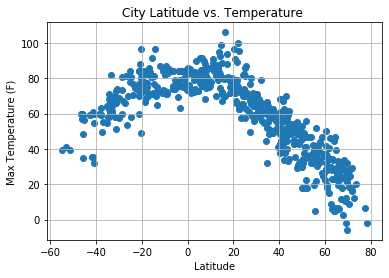

In [35]:
plt.scatter(city_data_df['Latitude'], city_data_df['Temperature'])
plt.title(f'City Latitude vs. Temperature ')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

plt.show()

#### Latitude vs. Humidity Plot

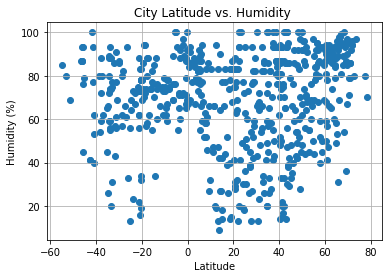

In [36]:
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'])
plt.title(f'City Latitude vs. Humidity ')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

plt.show()

#### Latitude vs. Cloudiness Plot

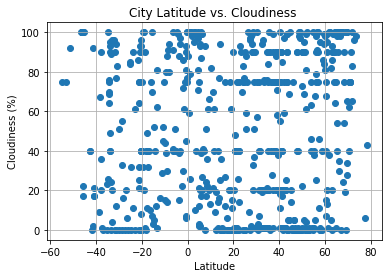

In [37]:
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'])
plt.title(f'City Latitude vs. Cloudiness ')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)


#### Latitude vs. Wind Speed Plot

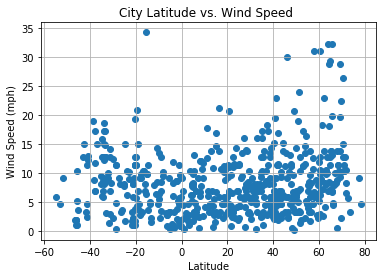

In [40]:
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'])
plt.title(f'City Latitude vs. Wind Speed ')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [54]:
# Create Northern and Southern Hemisphere DataFrames
n_hemisphere = city_data_df.loc[city_data_df['Latitude'] >= 0]
s_hemisphere = city_data_df.loc[city_data_df['Latitude'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9070649507732105


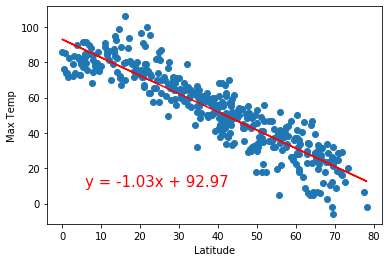

In [55]:
x_values = n_hemisphere['Latitude']
y_values = n_hemisphere['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7285566349051195


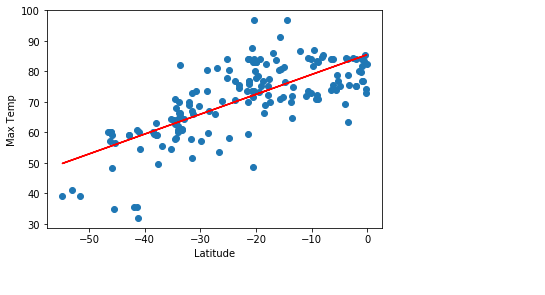

In [56]:
x_values = s_hemisphere['Latitude']
y_values = s_hemisphere['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2382985576167971


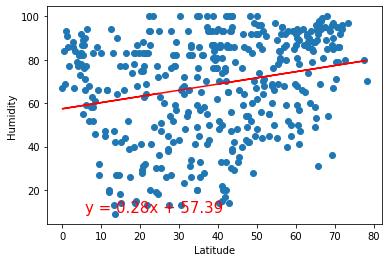

In [57]:
x_values = n_hemisphere['Latitude']
y_values = n_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1435724328684863


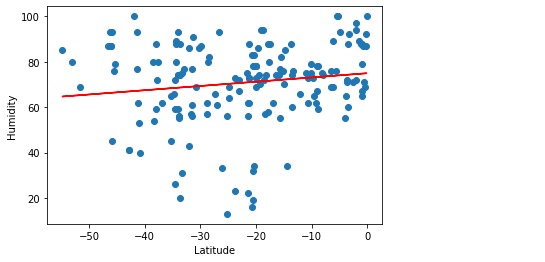

In [58]:
x_values = s_hemisphere['Latitude']
y_values = s_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16130793533237006


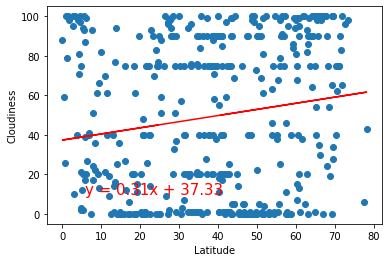

In [59]:
x_values = n_hemisphere['Latitude']
y_values = n_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04610804751769336


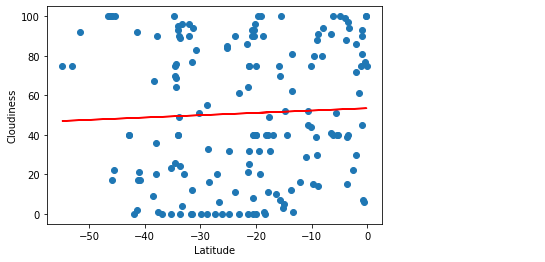

In [60]:
x_values = s_hemisphere['Latitude']
y_values = s_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.27170547861401334


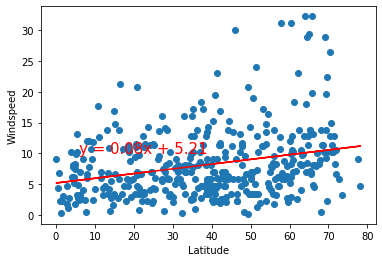

In [61]:
x_values = n_hemisphere['Latitude']
y_values = n_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.18600477358674386


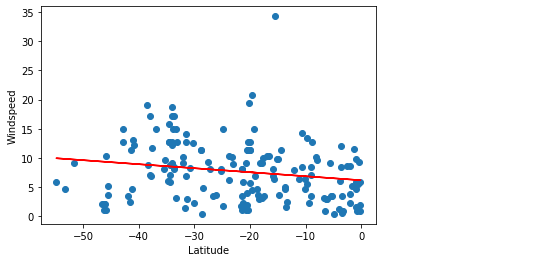

In [63]:
x_values = s_hemisphere['Latitude']
y_values = s_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
print(f"The r-squared is: {rvalue}")
plt.show()